<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighborhood      61 non-null     object 
 1   flat              61 non-null     object 
 2   flatType          61 non-null     object 
 3   squareMeters      61 non-null     float64
 4   price             61 non-null     int64  
 5   pricePerSM        61 non-null     int64  
 6   constructionYear  61 non-null     int64  
 7   floorNumber       61 non-null     int64  
 8   elevator          61 non-null     object 
 9   condition         61 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.9+ KB
       squareMeters          price   pricePerSM  constructionYear  floorNumber
count     61.000000      61.000000    61.000000         61.000000    61.000000
mean      27.903279  101013.672131  3757.278689       2002.819672     3.229508
std        4.887636   30624.300294

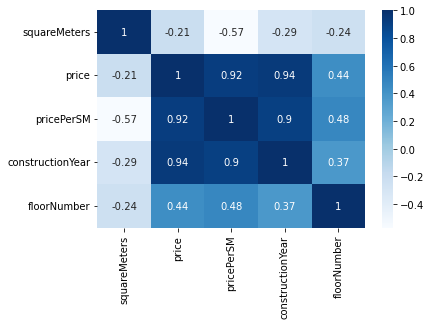

R2 score: 0.7235862709196277
Mean Absolute Error: 9238.329864022518
Mean Squared Error: 205374301.94300127
Root Mean Squared Error: 14330.886293003698


In [12]:
""" ########################

MULTIPLE LINEAR REGRESSION USING SKLEARN

    Predicts the relationship between multiple variables

    Question:
    How I could predict the selling price using multiple variables?

    Steps for linear regression
    1. Create x and y
    2. Create Train and Test set
    3. Train the model
    4. Make prediction
    5. Evaluate the model

########################### """

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sn
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.DataFrame(pd.read_csv("housePrices.csv", sep="\;", decimal=",", engine="python"))
data.head()

# Check the possible null values
data.info()
print(data.describe())

# Create correlation matrix to review correlations
corrMatrix = data.corr()
sn.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

# Prepare the data
x = data[["squareMeters", "constructionYear", "floorNumber"]]
y = data["price"]

# Split the data into training ja test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,
                                                            test_size = 0.3,
                                                            random_state=100)

# Fit the regression line using sklearn package
lr = LinearRegression()
lr.fit(x_train, y_train)

# Check the coefficients
coeff_df = pd.DataFrame(lr.coef_, x.columns, columns=["Coefficient"])
coeff_df

# Make predictions
y_pred = lr.predict(x_test)

df_predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df_predictions

# Evaluate the performance of the algorithm
print("R2 score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred)) # MAE
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False)) # RMSE

"""
USE ERROR METRICS FOR EVALUATION OF THE MODEL PERFORMANCE

R2 score is 0.7235 which means that chosen variables explains 72,35% of the apartment's price. In other words
approx. 72% of dependent variability can be explained by the model. The model is not perfect but quite robust.

The value of root mean squared error is 14330.89 which is approx. 14% of the mean of all prices 101013.67€. The smaller RMSE the better.

The mean absolute error is taking the sum of the absolute value of error and is 9238.33 which means the predicted value distance from
the real value is 9238.33.

Multiple linear regression doesn't predict perfectly the price but gives quite good estimate anyway.

"""